In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime as dt

%matplotlib inline

#filtrado de warnings
warnings.filterwarnings('ignore')

# haciendo los graficos un poco mas bonitos en matplotlib
plt.style.use('default') 
#plt.rcParams['figure.figsize'] = (20, 10)

# seteando tipo de grid en seaborn
sns.set_theme(style='ticks', palette=None, font_scale=.9) 

# elimino la notacion cientifica en los outputs en pandas
pd.options.display.float_format = '{:20,.2f}'.format

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#P3 - Para el promedio de stars por cada ciudad, ¿cuáles son los 5 promedios más comunes?

Es probable que haya nombres de ciudades con distinto formato y pandas a eso lo va a considerar como ciudades con distinto nombre (por ejemplo La Plata para pandas es distinto que la plata u alguna otra forma de escribirlo), entonces:

In [ ]:
business_df_ciudades_y_estrellas = pd.read_csv('/content/drive/MyDrive/TP_Datos_1C2022/business.csv', usecols=['city', 'stars'])

In [ ]:
business_df_ciudades_y_estrellas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   city    150346 non-null  object 
 1   stars   150346 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.3+ MB


In [ ]:
business_df_ciudades_y_estrellas.head()

,city,stars
0,Santa Barbara,5.00
1,Affton,3.00
2,Tucson,3.50
3,Philadelphia,4.00
4,Green Lane,4.50


In [ ]:
business_df_ciudades_y_estrellas['city'] = business_df_ciudades_y_estrellas['city'].str.lower()
business_df_ciudades_y_estrellas['city'] = business_df_ciudades_y_estrellas['city'].str.title() 

In [ ]:
ciudades_y_estrellas_df = business_df_ciudades_y_estrellas.groupby('city').agg({'stars':'mean'})
ciudades_y_estrellas_df.head()

,stars
city,
Ab Edmonton,4.50
Abington,3.54
Abington Township,4.17
Affton,3.49
Afton,4.00


In [ ]:
cinco_promedios_mas_comunes = ciudades_y_estrellas_df.stars.value_counts().head()

In [ ]:
promedios_mas_comunes = list(cinco_promedios_mas_comunes.index)

###Respuesta:

In [ ]:
print(f"Los 5 promedios mas comunes son: {promedios_mas_comunes[0]} {promedios_mas_comunes[1]} {promedios_mas_comunes[2]} {promedios_mas_comunes[2]} {promedios_mas_comunes[4]}")

Los 5 promedios mas comunes son: 4.0 3.5 4.5 4.5 5.0


#P10 - ¿Cual es el nombre del usuario que hizo más reviews en el estado de California?

In [ ]:
review_df_user_business = pd.read_csv('/content/drive/MyDrive/TP_Datos_1C2022/review.csv', usecols=['user_id', 'business_id'])

In [ ]:
display(review_df_user_business.user_id.hasnans, review_df_user_business.business_id.hasnans)

False

False

In [ ]:
review_df_user_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3838105 entries, 0 to 3838104
Data columns (total 2 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      object
 1   business_id  object
dtypes: object(2)
memory usage: 58.6+ MB


In [ ]:
user_df_user_name = pd.read_csv('/content/drive/MyDrive/TP_Datos_1C2022/user.csv', usecols=['user_id', 'name'])

In [ ]:
display(user_df_user_name.user_id.hasnans, user_df_user_name.name.hasnans)

False

True

In [ ]:
user_df_user_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987897 entries, 0 to 1987896
Data columns (total 2 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   user_id  object
 1   name     object
dtypes: object(2)
memory usage: 30.3+ MB


In [ ]:
user_df_user_name['name'] = user_df_user_name.name.fillna("Sin datos")

In [ ]:
business_df_business_y_estados = pd.read_csv('/content/drive/MyDrive/TP_Datos_1C2022/business.csv', usecols=['business_id', 'state'])
california_business_df = business_df_business_y_estados[business_df_business_y_estados['state'] == 'CA' ]

In [ ]:
california_business_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5203 entries, 0 to 150303
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  5203 non-null   object
 1   state        5203 non-null   object
dtypes: object(2)
memory usage: 121.9+ KB


In [ ]:
business_review_df_california = california_business_df.merge(review_df_user_business).drop(columns='business_id')
business_review_df_california.head()

,state,user_id
0,CA,81CW8cGriSJM67-ZrijO-A
1,CA,aWZRFmKByX9sLLU2isIzOA
2,CA,QFnbH9Jf7enwAL0micdA_w
3,CA,KBExKQt3_gpwv9X2gfPjEg
4,CA,kRtMtb7cq3Zahl0MEfLvsw


In [ ]:
business_review_user_df_california = business_review_df_california.merge(user_df_user_name).drop(columns='user_id')
business_review_user_df_california.head()

,state,name
0,CA,Tydus
1,CA,Charlie
2,CA,Charlie
3,CA,Charlie
4,CA,Charlie


###Respuesta:

In [ ]:
nombre_usuario = business_review_user_df_california.name.value_counts().head(1)
nombre_usuario = list(nombre_usuario.index)[0]
print(f"El nombre del usuario que hizo más reviews en el estado de California es {nombre_usuario}")

El nombre del usuario que hizo más reviews en el estado de California es Jennifer


#P23 - ¿Cúal es la correlación entre el score que dejaron los usuarios en cada review después de 2017, y el score promedio que dejaron en todas las reviews del 2017? Calcule sin usar samples.

In [ ]:
review_df_user_stars_date = pd.read_csv('/content/drive/MyDrive/TP_Datos_1C2022/review.csv', usecols=['user_id', 'stars', 'date'])

In [ ]:
review_df_user_stars_date['date'] = pd.to_datetime(review_df_user_stars_date['date'])

In [ ]:
review_df_user_stars_date_en_2017 = review_df_user_stars_date[review_df_user_stars_date['date'].dt.year == 2017]

In [ ]:
review_df_user_stars_en_2017 = review_df_user_stars_date_en_2017.groupby('user_id').agg({'stars':'mean'}).reset_index().rename(columns = {'stars':'average score in 2017'})

In [ ]:
review_df_user_stars_en_2017.head()

,user_id,average score in 2017
0,---2PmXbF47D870stH1jqA,5.00
1,---UgP94gokyCDuB5zUssA,4.00
2,---r61b7EpVPkb4UVme5tA,5.00
3,--0nrvOSAIuhL1Tk4qTrvQ,5.00
4,--13zE3NaRvLSrmfTVnFJA,2.00


In [ ]:
review_df_user_stars_despues_2017 = review_df_user_stars_date[review_df_user_stars_date['date'].dt.year > 2017] 
review_df_user_stars_despues_2017 = review_df_user_stars_despues_2017.drop(columns=['date'])
review_df_user_stars_despues_2017 = review_df_user_stars_despues_2017.rename(columns = {'stars':'score since 2018'})

In [ ]:
review_df_user_stars_despues_2017.head()

,user_id,score since 2018
0,mh_-eMZ6K5RLWhZyISBhwA,3.00
2,RreNy--tOmXMl1en0wiBOg,4.00
8,aFa96pz67TwOFu4Weq5Agg,5.00
9,iYY5Ii1LGpZCpXFkHlMefw,5.00
11,S7bjj-L07JuRr-tpX1UZLw,4.00


###Respuesta:

In [ ]:
review_df_user_stars_en_2017.merge(review_df_user_stars_despues_2017).drop(columns='user_id').corr()

,average score in 2017,score since 2018
average score in 2017,1.00,0.26
score since 2018,0.26,1.00


#V8

In [ ]:
review_df_date = pd.read_csv('/content/drive/MyDrive/TP_Datos_1C2022/review.csv', usecols=['date'])

In [ ]:
review_serie_date = pd.to_datetime(review_df_date['date'])

In [ ]:
review_serie_fechas_ordenadas = review_serie_date.sort_values()

In [ ]:
review_serie_fechas_ordenadas.head()

1973644   2017-01-01 00:00:35
3518187   2017-01-01 00:00:41
1602761   2017-01-01 00:00:52
493287    2017-01-01 00:01:12
858905    2017-01-01 00:01:58
Name: date, dtype: datetime64[ns]

In [ ]:
resultado = (review_serie_fechas_ordenadas.iloc[1:].values.astype(int)-review_serie_fechas_ordenadas.iloc[:len(review_serie_fechas_ordenadas)-1].values.astype(int))*10e-10
resultado

array([ 6., 11., 20., ...,  3.,  6., 20.])

In [ ]:
serie = pd.Series(resultado)
review_df_diferencia_entre_reviews = serie.to_frame()
review_df_diferencia_entre_reviews = review_df_diferencia_entre_reviews.rename(columns={0:'Segundos'})

###Respuesta

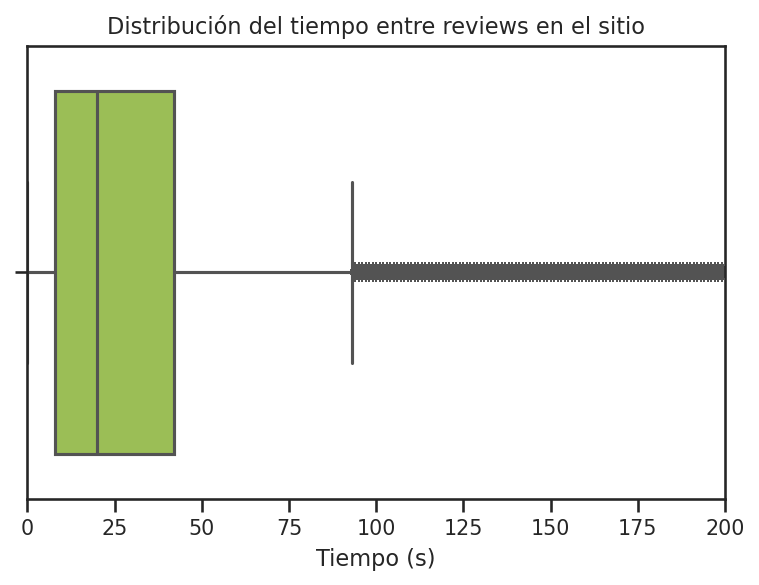

In [ ]:
plt.rcParams['figure.dpi'] = 150
sns.boxplot(data=review_df_diferencia_entre_reviews[review_df_diferencia_entre_reviews['Segundos'] < 200], x='Segundos', color='#a1cf45')
plt.xlim(0, 200)
plt.xlabel("Tiempo (s)")
plt.title("Distribución del tiempo entre reviews en el sitio")
plt.show()